In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson 
# distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the 
# probability of cars waiting at the drive-up window.

In [83]:
import seaborn as sns
from scipy.stats import poisson

In [175]:
mu = 2
n = 100_000

In [85]:
data_poisson = poisson.rvs(mu=2, size=1000)

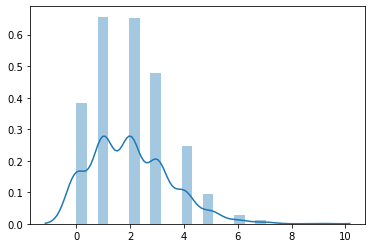

In [86]:
sns.distplot(data_poisson)

In [180]:
waiting_cars = np.random.poisson(2,n)
waiting_cars

array([2, 5, 0, ..., 2, 1, 1])

In [ ]:
# What is the probability that no cars drive up in the noon hour?

In [181]:
waiting = pd.DataFrame(waiting_cars)

In [192]:
(waiting == 0).mean()

0    0.13488
dtype: float64

In [29]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [ ]:
# What is the probability that 3 or more cars come through the drive through?

In [193]:
(waiting >= 3).mean()

0    0.32371
dtype: float64

In [197]:
stats.poisson(2).sf(2)

0.32332358381693654

In [ ]:
# How likely is it that the drive through gets at least 1 car?

In [194]:
(waiting >= 1).mean()

0    0.86512
dtype: float64

In [198]:
stats.poisson(2).sf(0)

0.8646647167633873

In [ ]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. 
# Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?

# 

In [155]:
n = 100_000
y = np.random.normal(3,.3, n)
y.shape

(100000,)

In [156]:
x =np.quantile(y,.95)
x

3.4939753731637695

Text(0.5, 1.0, 'Outcome of 100,000 Grade Sims')

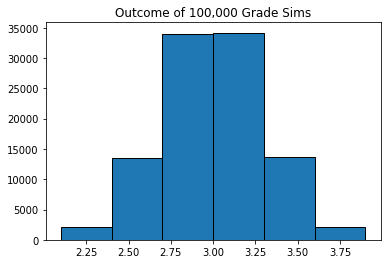

In [157]:
plt.hist(y, bins=[2.1,2.4,2.7,3,3.3, 3.6,3.9], edgecolor='black')
plt.title(f'Outcome of {n:,} Grade Sims')

In [3]:
stats.norm(3,.3).isf(.05)

3.4934560880854417

In [72]:
stats.norm(3,.3).ppf(.95)

3.4934560880854417

In [ ]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this 
# scholarship?

In [199]:
x = round(np.quantile(y,.20),3) #lower decile
x

2.748

In [200]:
z= round(np.quantile(y,.29),3) #upper decile
z

2.834

In [201]:
(x,z) # yes, a 2.8 GPA would qualify

(2.748, 2.834)

In [165]:
round(stats.norm(3,.3).ppf(.21),3) # 20% decile

2.758

In [166]:
round(stats.norm(3,.3).ppf(.3),3) #30% decile

2.843

In [ ]:
#If I have a GPA of 3.5, what percentile am I in?

In [203]:
stats.norm(3,.3).cdf(3.5)

0.9522096477271853

In [ ]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs.  How likely is it that this many people or more click through?

In [291]:
n = 100_000
μ_click_throughs = .02
visitors = 4326
click_throughs = 97

<BarContainer object of 80 artists>

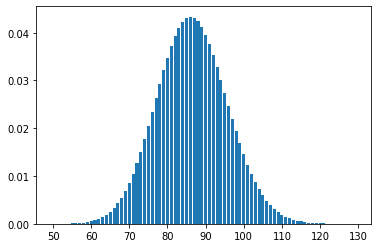

In [294]:
x = np.arange(50,130)
y = stats.binom(visitors, .02).pmf(x)

plt.bar(x,y)

In [227]:
click_throughs = np.random.binomial(visitors, .02, n)
click_throughs

array([88, 92, 81, ..., 86, 86, 85])

In [228]:
ct = pd.DataFrame(click_throughs)

In [231]:
(ct >= 97).mean()

0    0.13906
dtype: float64

In [204]:
stats.binom(4326,.02).sf(96)

0.1397582363130086

In [ ]:
#  4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability 
# rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each 
# question.

# What is the probability that at least one of your first 60 answers is correct?

In [254]:
response = np.random.binomial(60,.01,100_000)

In [258]:
response


array([0, 0, 0, ..., 1, 0, 1])

In [260]:
rt_resp = pd.DataFrame(response)

In [261]:
(rt_resp >= 1 ).mean()

0    0.45259
dtype: float64

In [265]:
1-stats.binom(60,.01).cdf(0)

0.4528433576092388

In [ ]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% 
# chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 
# 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up 
# each day? How likely is it that it goes two days without getting cleaned up? All week?

In [70]:
chance_student_cleans = .03
daily_students_in_kitchen = 59.4
daily_chance_student_cleans = .1782     

In [299]:
stats.binom(59.4,.03).pmf(2)

0.2717123338108394

In [300]:
stats.binom(59.4,.03).pmf(1)

0.3008686801329963

In [ ]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After 
# several weeks of careful observation, you notice that the average number of people in line when your lunch 
# break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes 
# for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that 
# you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have 
# one hour for lunch, and ignore travel time to and from La Panaderia.

In [49]:
ncol = 10_000
avg_people_in_line = 15
time_to_order = 2
sd_line = 3
order_to_food = 10
#prob 15+ minutes to eat

In [73]:
x = np.round(np.random.normal(avg_people_in_line, sd_line, ncol),0).astype('int64')

In [74]:
people_in_line = pd.DataFrame(x)


In [167]:
time_order_eat = people_in_line * time_to_order + order_to_food


In [47]:
time_order_eat.apply(lambda row : True if row.sum() <= 45 else False, axis = 1).mean()

0.7934

In [82]:
time_order_eat2 = stats.norm(30, 6).cdf(35)
time_order_eat2

0.7976716190363569

In [ ]:
# Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation. Model the distribution of employees salaries with a normal distribution and answer the following 
# questions:
    
# What do the top 5% of employees make?

In [5]:
n = 1_000_000
av_sal_curr_emp = 72_012.24 #from SQL
std_curr_emp = 17_309.96 #from SQL

In [ ]:
# SQL query
#SELECT AVG(salary), STD(salary) 
# FROM salaries
# WHERE to_date > NOW();


In [3]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'
df = pd.read_sql('SELECT * FROM salaries WHERE to_date > NOW()', url)

In [6]:
salary = np.random.normal(av_sal_curr_emp, std_curr_emp, n)
salary

array([26495.44541792, 67873.93891953, 41190.44076763, ...,
       79179.34124167, 76742.23085655, 87799.37517224])

In [8]:
salary_df = pd.DataFrame(salary)

In [ ]:
# What percent of employees earn less than 60,000?

In [9]:
(salary_df < 60_000).mean()

0    0.243518
dtype: float64

In [10]:
stats.norm(av_sal_curr_emp, std_curr_emp).cdf(60_000)

0.24385690499062396

In [ ]:
#What percent of employees earn more than 95,000?

In [11]:
(salary_df > 95_000).mean()

0    0.091675
dtype: float64

In [12]:
stats.norm(av_sal_curr_emp, std_curr_emp).sf(95_000)

0.09208778318255045

In [ ]:
# What percent of employees earn between 65,000 and 80,000?

In [13]:
 ((salary_df > 65_000) & (salary_df < 80_000)).mean() # & is to combine two arrays in Numpy and Pandas

0    0.33531
dtype: float64

In [14]:
stats.norm(av_sal_curr_emp, std_curr_emp).cdf(80_000) - stats.norm(av_sal_curr_emp, std_curr_emp).cdf(65_000)

0.3350612132350322

In [18]:
(salary_df > 95_000).mean()

0    0.091675
dtype: float64

In [ ]:
# What do the top 5% of employees make?

In [290]:
stats.norm(av_sal_curr_emp, std_curr_emp).isf(.05)

100484.59048838491

In [17]:
 salary_df.quantile(.95)

0    100444.971606
Name: 0.95, dtype: float64